In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
df.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [8]:
df.duplicated().value_counts()

False    1337
True        1
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: xlabel='charges', ylabel='Count'>

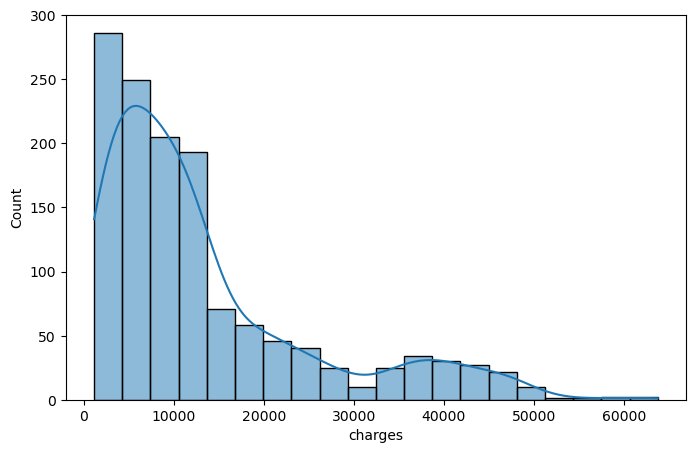

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(x='charges',data=df,bins=20,kde=True)

<Axes: xlabel='charges'>

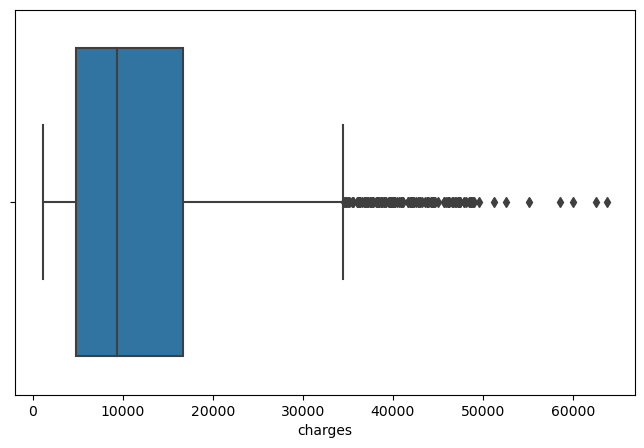

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='charges',data=df)

### Training and Testing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder
from sklearn import metrics

In [14]:
x=df.drop('charges',axis=1)
y=df['charges']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=86)

encode = TargetEncoder()
encoded_x_train = encode.fit_transform(x_train,y_train)
encoded_x_test = encode.transform(x_test)

scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(encoded_x_train)
scaled_x_test = scaler.transform(encoded_x_test)

lr_reg = LinearRegression()
lr_reg = lr_reg.fit(scaled_x_train,y_train)
lr_reg

LinearRegression()

In [15]:
charges_predicted =  lr_reg.predict(scaled_x_test)

Text(0, 0.5, 'charges_predicted')

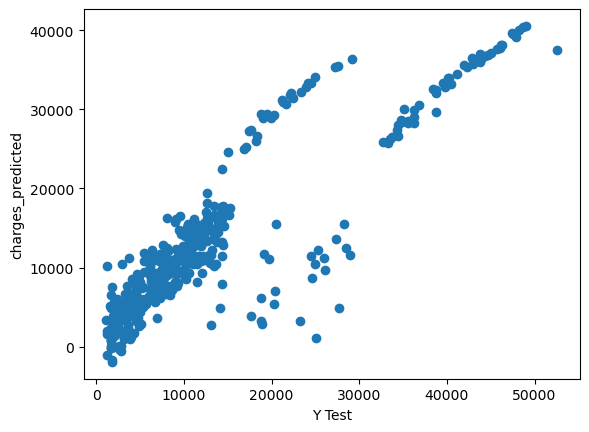

In [16]:
plt.scatter(y_test,charges_predicted)
plt.xlabel('Y Test')
plt.ylabel('charges_predicted')

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, charges_predicted)

0.7844735526290344

In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,charges_predicted)
print(f'mse : {mse}')
rmse = np.sqrt(mean_squared_error(y_test,charges_predicted))
print(f'rmse : {rmse}')

mse : 31147385.76500445
rmse : 5580.984300730871
